In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from getdist import plots
from getdist import MCSamples
from getdist import loadMCSamples
import glob 
import matplotlib
import os 

In [26]:
#Aesthetics for plot
matplotlib.rcParams['axes.linewidth'] = 5
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.labelsize'] = 75
matplotlib.rcParams['xtick.labelsize'] = 65 
matplotlib.rcParams['ytick.labelsize'] = 65
matplotlib.rcParams['legend.fontsize'] = 100

## In this notebook we plot the contours of the MCMC chains

### Getting the chains downloaded

In [13]:
directory_path_ede_mnu = '../chains /ede_mnu'
directory_path_lcdm_mnu = '../chains /lcdm_mnu'
directory_path_lcdm = '../chains /lcdm'
directory_path_ede = '../chains /ede'

In [14]:
file_list_ede_mnu = glob.glob(directory_path_ede_mnu+ '/2021' + '*' + '.txt')
file_list_lcdm_mnu = glob.glob(directory_path_lcdm_mnu+ '/2021' + '*' + '.txt')
file_list_lcdm = glob.glob(directory_path_lcdm+ '/2021' + '*' + '.txt')
file_list_ede = glob.glob(directory_path_ede+ '/2022' + '*' + '.txt')


In [15]:
print(file_list_ede_mnu)
print(file_list_lcdm_mnu)
print(file_list_lcdm)
print(file_list_ede)

['../chains /ede_mnu/2021-10-18_40000__8.txt', '../chains /ede_mnu/2021-10-18_180000__6.txt', '../chains /ede_mnu/2021-10-18_180000__7.txt', '../chains /ede_mnu/2021-10-18_180000__5.txt', '../chains /ede_mnu/2021-10-18_180000__4.txt', '../chains /ede_mnu/2021-10-18_180000__1.txt', '../chains /ede_mnu/2021-10-18_180000__3.txt', '../chains /ede_mnu/2021-10-18_180000__2.txt', '../chains /ede_mnu/2021-10-18_180000__8.txt', '../chains /ede_mnu/2021-10-18_40000__3.txt', '../chains /ede_mnu/2021-10-18_40000__2.txt', '../chains /ede_mnu/2021-10-18_40000__1.txt', '../chains /ede_mnu/2021-10-18_40000__5.txt', '../chains /ede_mnu/2021-10-18_40000__4.txt', '../chains /ede_mnu/2021-10-18_40000__6.txt', '../chains /ede_mnu/2021-10-18_40000__7.txt']
['../chains /lcdm_mnu/2021-10-17_120000__3.txt', '../chains /lcdm_mnu/2021-10-17_120000__2.txt', '../chains /lcdm_mnu/2021-10-17_120000__1.txt', '../chains /lcdm_mnu/2021-10-17_120000__4.txt']
['../chains /lcdm/2021-10-18_900000__8.txt', '../chains /lcdm/

In [16]:
i = 0
for file in file_list_ede_mnu: 
    
    data = np.genfromtxt(file)
    
    data = np.vstack((data[:,8],data[:,-3],data[:,-5],data[:,-1]))
    
    if i ==0:
        chains_ede_mnu = data
    else:
        chains_ede_mnu = np.hstack((chains_ede_mnu,data))
    
    i+=1
    

In [17]:
i = 0
for file in file_list_lcdm_mnu: 
    
    data = np.genfromtxt(file)
    
    data = np.vstack((data[:,8],data[:,-3],data[:,-5],data[:,-1]))
    
    if i ==0:
        chains_lcdm_mnu = data
    else:
        chains_lcdm_mnu = np.hstack((chains_lcdm_mnu,data))
    
    i+=1

In [18]:
i = 0
for file in file_list_lcdm: 
    
    data = np.genfromtxt(file)
    
    data = np.vstack((data[:,-3],data[:,-5],data[:,-1]))
    
    if i ==0:
        chains_lcdm = data
    else:
        chains_lcdm = np.hstack((chains_lcdm,data))
    
    i+=1

In [19]:
i = 0
for file in file_list_ede: 
    
    data = np.genfromtxt(file)
    
    data = np.vstack((data[:,-3],data[:,-5],data[:,-1]))
    
    if i ==0:
        chains_ede = data
    else:
        chains_ede = np.hstack((chains_ede,data))
    
    i+=1

### Create names and labels and load in the samples, remove 30% as burn-in

In [20]:

names = ['M_nu', 'H_0', 'Omega_m', 'sigma_8']
labels = [r'M_\nu\,[{\rm eV}]', r'H_0\,[{\rm km}/{\rm s}/{\rm Mpc}]','Omega_m', '\sigma_8']

names2 = [ 'H_0','Omega_m', 'sigma_8']
labels2 = [r'H_0\,[{\rm km}/{\rm s}/{\rm Mpc}]','Omega_m', '\sigma_8']

In [21]:
ede_mnu_samples = MCSamples(samples = chains_ede_mnu.T, names=names, labels=labels,settings={'smooth_scale_2D':0.5, 'smooth_scale_1D':0.3})
ede_mnu_samples.removeBurn(remove=0.3)
lcdm_mnu_samples = MCSamples(samples = chains_lcdm_mnu.T, names=names, labels=labels,settings={'smooth_scale_2D':0.5, 'smooth_scale_1D':0.3})
lcdm_mnu_samples.removeBurn(remove=0.3)
lcdm_samples = MCSamples(samples = chains_lcdm.T, names=names2, labels=labels2,settings={'smooth_scale_2D':0.5, 'smooth_scale_1D':0.3})
lcdm_samples.removeBurn(remove=0.3)
ede_samples = MCSamples(samples = chains_ede.T, names=names2, labels=labels2,settings={'smooth_scale_2D':0.5, 'smooth_scale_1D':0.3})
ede_samples.removeBurn(remove=0.3)


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


## Add the S8 parameter

In [22]:
def add_s8(samples):
    p = samples.getParams()
    print(dir(p))
    samples.addDerived(p.sigma_8*(p.Omega_m/0.3)**0.5, name='S8', label='S_8')

In [23]:
add_s8(ede_mnu_samples)
add_s8(lcdm_mnu_samples)
add_s8(lcdm_samples)
add_s8(ede_samples)

['H_0', 'M_nu', 'Omega_m', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'sigma_8']
['H_0', 'M_nu', 'Omega_m', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'sigma_8']
['H_0', 'Omega_m', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '_

In [24]:
#SHOES AND 3X2pt CONSTRAINT from HILL et al. 
h_center=74.03
h_sigma=1.42


S8_center = 0.77
S8_sigma = 0.018

In [25]:
param_limits ={
    'M_nu': [0,0.25]
}

In [27]:
settings = plots.GetDistPlotSettings()
settings.axes_fontsize = 40
settings.legend_fontsize = 80
settings.lab_fontsize = 40

Text(0.08, 0.8, '$M_\\nu \\leq 0.15eV$')

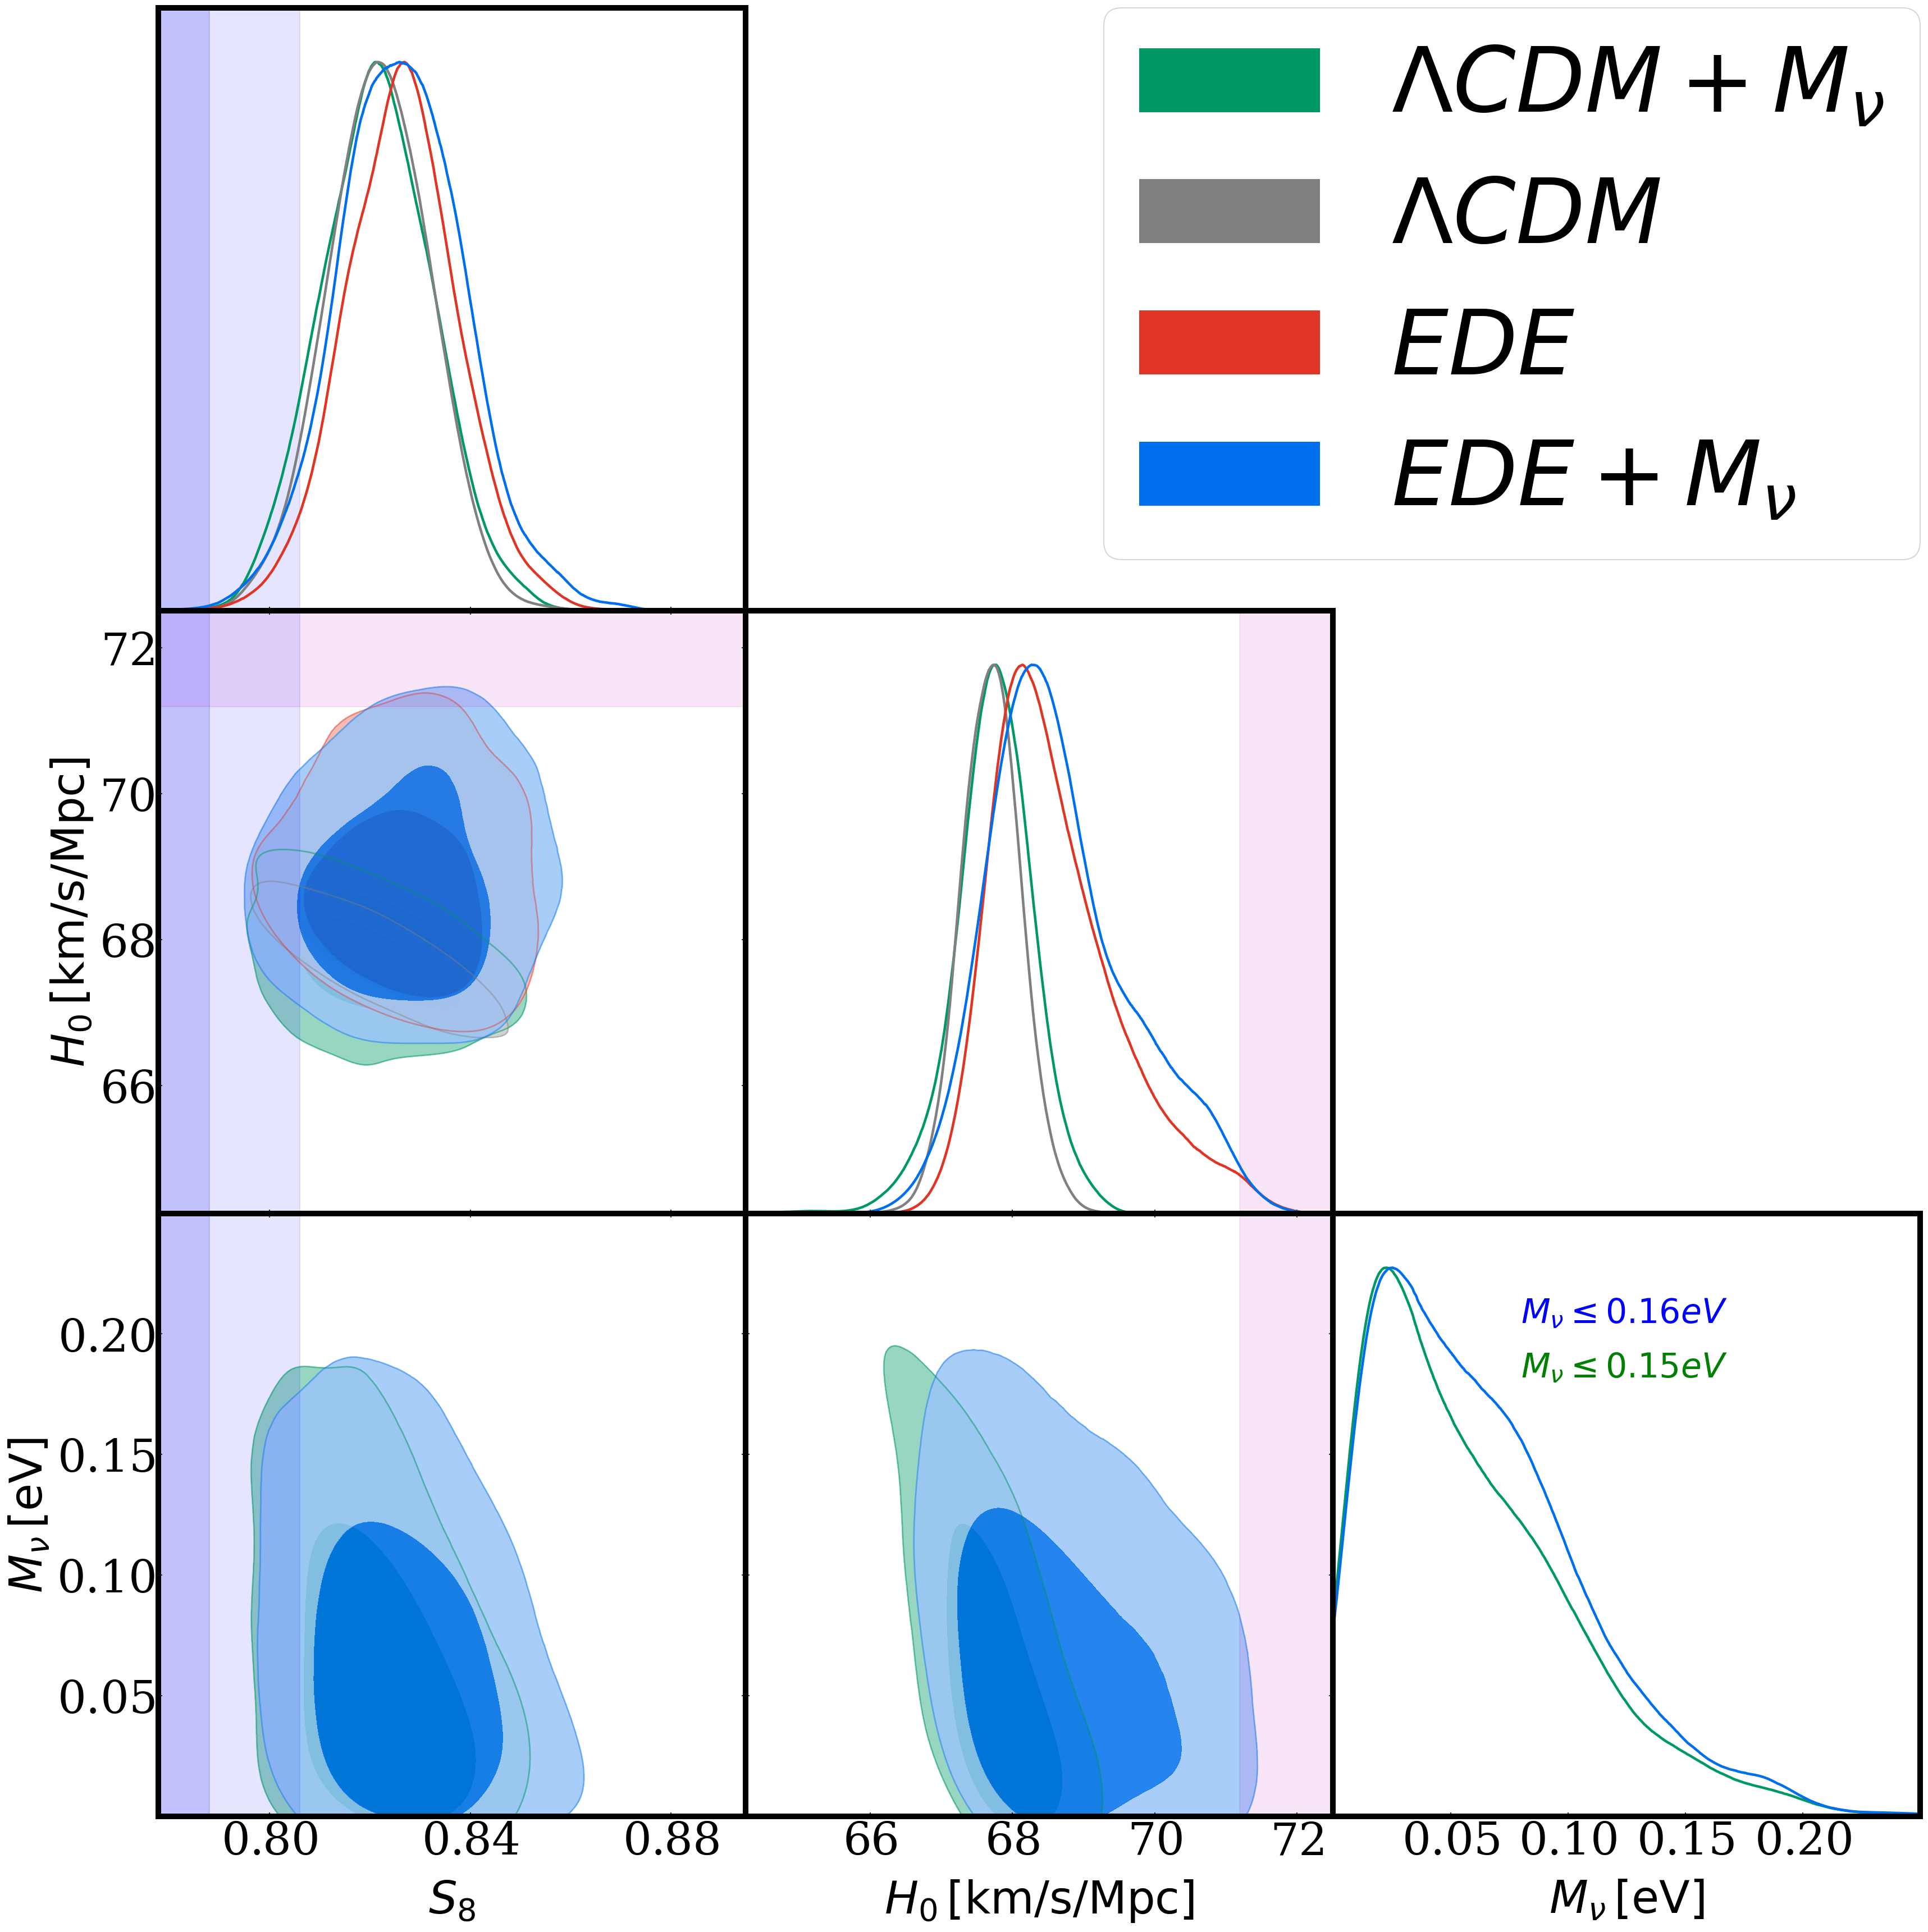

In [28]:
# Triangle plot
g = plots.get_subplot_plotter(subplot_size=8, settings=settings)
g.triangle_plot([lcdm_mnu_samples,lcdm_samples,ede_samples, ede_mnu_samples],params=['S8','H_0','M_nu'], legend_labels=[r'$\Lambda CDM + M_\nu$', r'$\Lambda CDM$', '$EDE$',r'$EDE+M_\nu$'], param_limits=param_limits, filled=True)

#add band constraints 
g.add_y_bands(h_center, h_sigma,color='m', ax=3)
g.add_x_bands(h_center, h_sigma,color='m', ax=4)
g.add_x_bands(h_center, h_sigma,color='m', ax=7)

g.add_x_bands(S8_center, S8_sigma,color='b', ax=0)
g.add_x_bands(S8_center, S8_sigma,color='b', ax=3)
g.add_x_bands(S8_center, S8_sigma,color='b', ax=6)

g.subplots[2,2].text(0.08,0.9,r'$M_\nu \leq 0.16eV$', fontsize=30, color='b')
g.subplots[2,2].text(0.08,0.8,r'$M_\nu \leq 0.15eV$', fontsize=30, color='g')

# g.add_legend([r'$\Lambda CDM + M_\nu$', r'$EDE+M_\nu$', r'$\Lambda CDM$', 'EDE'], colored_text=True)

In [ ]:
g.export('triangle_plot_s8+h0.pdf')